In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [59]:
!pip install xgboost 
!pip install lightgbm
!pip install catboost

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
## 분류 싱글
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from IPython.display import Image
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [4]:
df=pd.read_excel("../csv-data/쇼핑몰프로젝트합2019.xlsx")
df

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),네이버 태그 클릭량
0,2019,생활/취미/사무용품/인테리어/골프용품,평일,목,B.06-10시,F,A.2O대,291,98.7,10.9,18.6,22.8,47.7,3.3,83.20
1,2019,생활/취미/사무용품/인테리어/골프용품,휴일,일,F.22-02시,M,B.3O대,51,86.3,14.6,21.3,22.4,41.7,2.9,25.30
2,2019,생활/취미/사무용품/인테리어/골프용품,평일,목,B.06-10시,F,B.3O대,758,96.9,10.7,17.0,21.4,50.9,3.6,56.75
3,2019,생활/취미/사무용품/인테리어/골프용품,평일,화,C.10-14시,M,D.5O대,122,39.0,23.5,21.2,14.6,40.7,2.5,29.25
4,2019,생활/취미/사무용품/인테리어/골프용품,휴일,월,D.14-18시,F,E.60대이상,10,14.5,24.4,27.1,12.9,35.5,2.7,6.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,2019,패션/화장품,평일,수,A.02-06시,M,D.5O대,171,39.0,23.5,21.2,14.6,40.7,2.5,170.00
6851,2019,패션/화장품,휴일,월,F.22-02시,F,E.60대이상,71,14.5,24.4,27.1,12.9,35.5,2.7,161.00
6852,2019,패션/화장품,평일,월,B.06-10시,F,A.2O대,111,98.7,10.9,18.6,22.8,47.7,3.3,204.00
6853,2019,패션/화장품,휴일,수,F.22-02시,M,C.4O대,796,66.8,17.1,23.2,20.0,39.7,2.9,161.00


### ***EDA***

 **성별별 물품 구매현황** 

In [5]:
A=df.groupby(["성별","TAG"]).mean()
list(A['건수합계'])
A.loc['F',:].index
A.loc['F',:]['건수합계']

TAG
생활/취미/사무용품/인테리어/골프용품     479.935780
식료품                     1516.911111
애완용품                     163.391791
패션/화장품                  1408.216149
Name: 건수합계, dtype: float64

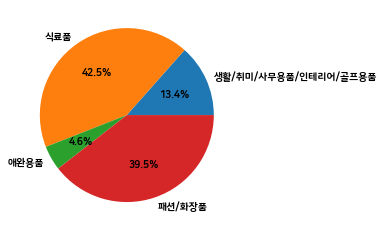

In [6]:
#여자들이 많이 사는 물품
ratio = list(A.loc['F',:]['건수합계'])
labels = list(A.loc['F',:].index)

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

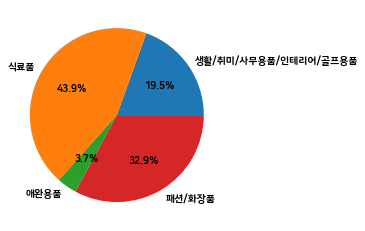

In [7]:
#남자들이 많이 사는 물품
ratio = list(A.loc['M',:]['건수합계'])
labels = list(A.loc['M',:].index)

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 라벨인코딩

In [8]:
list(set(df['TAG'])) , list(set(df['시간대'])) , list(set(df['연령대']))

(['생활/취미/사무용품/인테리어/골프용품', '패션/화장품', '애완용품', '식료품'],
 ['E.18-22시', 'A.02-06시', 'D.14-18시', 'F.22-02시', 'B.06-10시', 'C.10-14시'],
 ['E.60대이상', 'A.2O대', 'D.5O대', 'B.3O대', 'C.4O대'])

In [9]:
encoder=LabelEncoder()
df['TAG'].unique()
encoder.fit(df['TAG'].unique())
target=encoder.transform(df['TAG'])

df['TAG']= target
df['TAG']


0       0
1       0
2       0
3       0
4       0
       ..
6850    3
6851    3
6852    3
6853    3
6854    3
Name: TAG, Length: 6855, dtype: int32

In [10]:
encoder.classes_

array(['생활/취미/사무용품/인테리어/골프용품', '식료품', '애완용품', '패션/화장품'], dtype=object)

In [11]:
encoder2=LabelEncoder()
df['연령대'].unique()
encoder2.fit(df['연령대'].unique())
target=encoder2.transform(df['연령대'])

df['연령대']= target
df['연령대']

0       0
1       1
2       1
3       3
4       4
       ..
6850    3
6851    4
6852    0
6853    2
6854    0
Name: 연령대, Length: 6855, dtype: int32

In [12]:
encoder2.classes_

array(['A.2O대', 'B.3O대', 'C.4O대', 'D.5O대', 'E.60대이상'], dtype=object)

In [13]:
df['시간대'].unique()

array(['B.06-10시', 'F.22-02시', 'C.10-14시', 'D.14-18시', 'E.18-22시',
       'A.02-06시'], dtype=object)

In [14]:
encoder3 = LabelEncoder()
df['시간대'].unique()
encoder3.fit(df['시간대'].unique())
target=encoder3.transform(df['시간대'])

df['시간대']= target
df['시간대']

0       1
1       5
2       1
3       2
4       3
       ..
6850    0
6851    5
6852    1
6853    5
6854    5
Name: 시간대, Length: 6855, dtype: int32

In [15]:
encoder3.classes_

array(['A.02-06시', 'B.06-10시', 'C.10-14시', 'D.14-18시', 'E.18-22시',
       'F.22-02시'], dtype=object)

In [16]:
encoder4 = LabelEncoder()
df['평일휴일'].unique()
encoder4.fit(df['평일휴일'].unique())
target=encoder4.transform(df['평일휴일'])

df['평일휴일']= target
df['평일휴일']

0       0
1       1
2       0
3       0
4       1
       ..
6850    0
6851    1
6852    0
6853    1
6854    1
Name: 평일휴일, Length: 6855, dtype: int32

In [17]:
encoder4.classes_

array(['평일', '휴일'], dtype=object)

In [18]:
encoder5 = LabelEncoder()
df['성별'].unique()
encoder5.fit(df['성별'].unique())
target=encoder5.transform(df['성별'])

df['성별']= target
df['성별']

0       0
1       1
2       0
3       1
4       0
       ..
6850    1
6851    0
6852    0
6853    1
6854    1
Name: 성별, Length: 6855, dtype: int32

In [19]:
encoder5.classes_

array(['F', 'M'], dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 15 columns):
CRI_YM                   6855 non-null int64
TAG                      6855 non-null int32
평일휴일                     6855 non-null int32
요일                       6855 non-null object
시간대                      6855 non-null int32
성별                       6855 non-null int32
연령대                      6855 non-null int32
건수합계                     6855 non-null int64
인터넷 쇼핑 이용자 비율 (%)        6855 non-null float64
월 평균 구매빈도-1회 미만 (%)      6855 non-null float64
월 평균 구매빈도-1~2회 미만 (%)    6855 non-null float64
월 평균 구매빈도-2~3회 미만 (%)    6855 non-null float64
월 평균 구매빈도-3회 이상 (%)      6855 non-null float64
월 평균 구매빈도-평균 (회)         6855 non-null float64
네이버 태그 클릭량               6855 non-null float64
dtypes: float64(7), int32(5), int64(2), object(1)
memory usage: 669.6+ KB


In [21]:
df.drop(columns=["CRI_YM","요일"], inplace=True)

In [22]:
df

,TAG,평일휴일,시간대,성별,연령대,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),네이버 태그 클릭량
0,0,0,1,0,0,291,98.7,10.9,18.6,22.8,47.7,3.3,83.20
1,0,1,5,1,1,51,86.3,14.6,21.3,22.4,41.7,2.9,25.30
2,0,0,1,0,1,758,96.9,10.7,17.0,21.4,50.9,3.6,56.75
3,0,0,2,1,3,122,39.0,23.5,21.2,14.6,40.7,2.5,29.25
4,0,1,3,0,4,10,14.5,24.4,27.1,12.9,35.5,2.7,6.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,3,0,0,1,3,171,39.0,23.5,21.2,14.6,40.7,2.5,170.00
6851,3,1,5,0,4,71,14.5,24.4,27.1,12.9,35.5,2.7,161.00
6852,3,0,1,0,0,111,98.7,10.9,18.6,22.8,47.7,3.3,204.00
6853,3,1,5,1,2,796,66.8,17.1,23.2,20.0,39.7,2.9,161.00


In [23]:
df.corr()

,TAG,평일휴일,시간대,성별,연령대,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),네이버 태그 클릭량
TAG,1.000000,0.006077,-0.008134,-0.004962,-0.001000,0.180094,-0.000719,-0.000642,0.002617,-0.000988,-0.000175,0.001061,0.924234
평일휴일,0.006077,1.000000,0.010515,0.001530,-0.006244,-0.177725,0.007640,-0.004710,-0.003813,0.009023,0.000025,-0.000330,0.006501
시간대,-0.008134,0.010515,1.000000,-0.002628,0.014029,0.087147,-0.016067,0.011369,0.010318,-0.017637,-0.003898,-0.002296,-0.014945
성별,-0.004962,0.001530,-0.002628,1.000000,0.001186,-0.127714,-0.070866,0.113671,0.048227,-0.104439,-0.063525,-0.444134,-0.117364
연령대,-0.001000,-0.006244,0.014029,0.001186,1.000000,-0.160044,-0.968817,0.904795,0.658495,-0.938208,-0.568761,-0.398981,-0.135849
건수합계,0.180094,-0.177725,0.087147,-0.127714,-0.160044,1.000000,0.229629,-0.229580,-0.225245,0.222009,0.192444,0.227549,0.238746
인터넷 쇼핑 이용자 비율 (%),-0.000719,0.007640,-0.016067,-0.070866,-0.968817,0.229629,1.000000,-0.949838,-0.746700,0.966666,0.644920,0.522182,0.154776
월 평균 구매빈도-1회 미만 (%),-0.000642,-0.004710,0.011369,0.113671,0.904795,-0.229580,-0.949838,1.000000,0.803227,-0.880985,-0.794727,-0.718912,-0.161034
월 평균 구매빈도-1~2회 미만 (%),0.002617,-0.003813,0.010318,0.048227,0.658495,-0.225245,-0.746700,0.803227,1.000000,-0.586994,-0.942000,-0.693871,-0.150593
월 평균 구매빈도-2~3회 미만 (%),-0.000988,0.009023,-0.017637,-0.104439,-0.938208,0.222009,0.966666,-0.880985,-0.586994,1.000000,0.456045,0.433096,0.139088


In [24]:
df.iloc[:,:-2],

(      TAG  평일휴일  시간대  성별  연령대  건수합계  인터넷 쇼핑 이용자 비율 (%)  월 평균 구매빈도-1회 미만 (%)  \
 0       0     0    1   0    0   291               98.7                 10.9   
 1       0     1    5   1    1    51               86.3                 14.6   
 2       0     0    1   0    1   758               96.9                 10.7   
 3       0     0    2   1    3   122               39.0                 23.5   
 4       0     1    3   0    4    10               14.5                 24.4   
 ...   ...   ...  ...  ..  ...   ...                ...                  ...   
 6850    3     0    0   1    3   171               39.0                 23.5   
 6851    3     1    5   0    4    71               14.5                 24.4   
 6852    3     0    1   0    0   111               98.7                 10.9   
 6853    3     1    5   1    2   796               66.8                 17.1   
 6854    3     1    5   1    0  2470               94.3                 13.2   
 
       월 평균 구매빈도-1~2회 미만 (%)  월 평균 구매빈

In [25]:
df.columns

Index(['TAG', '평일휴일', '시간대', '성별', '연령대', '건수합계', '인터넷 쇼핑 이용자 비율 (%)',
       '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)', '월 평균 구매빈도-2~3회 미만 (%)',
       '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)', '네이버 태그 클릭량'],
      dtype='object')

In [37]:
X_train,X_test,y_train,y_test = train_test_split(
    df[['연령대', '평일휴일', '시간대', '성별', '건수합계','인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)','네이버 태그 클릭량']], df['TAG'],test_size=0.2, random_state=3)

In [38]:
dt=DecisionTreeClassifier(criterion='gini', max_depth = 3, max_features = 2, random_state=100).fit(X_train, y_train)

In [39]:
svm=SVC(C=0.1, gamma=0.04, random_state=35, probability=True, kernel='rbf').fit(X_train, y_train)

In [40]:
lr = LogisticRegression().fit(X_train, y_train)

In [41]:
dt_p = dt.predict(X_test)
svm_p=svm.predict(X_test)
lr_p=lr.predict(X_test)

In [42]:
hard_voting_clf=VotingClassifier(
    estimators=[('decision tree', dt),('LogisticRegression', lr ),('svm', svm)], weights=[1,1,1], voting='hard'
).fit(X_train, y_train)

hard_voting_predicted = hard_voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted) ## 다수결의 원칙으로 정함. 

0.8701677607585704

In [43]:
soft_voting_clf=VotingClassifier(
    estimators=[('decision tree', dt),('LogisticRegression', lr ),('svm', svm)], weights=[1,1,1], voting='soft'
).fit(X_train, y_train)

soft_voting_predicted = soft_voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted) ## 다수결의 원칙으로 정함. 

0.8701677607585704

In [44]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
).fit(X_train, y_train)

In [45]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.9445660102115244

In [66]:
dt.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.72393468e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.97018627e-03,
       4.28133696e-04, 0.00000000e+00, 9.96429287e-01])

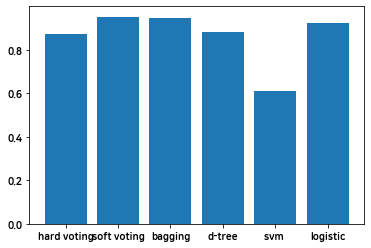

In [46]:
x = np.arange(6)
plt.bar(x, height= [
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted),
                    accuracy_score(y_test, rf_predt),
                    accuracy_score(y_test, dt_p),
                    accuracy_score(y_test, svm_p),
                    accuracy_score(y_test, lr_p)


            ])
plt.xticks(x, ['hard voting','soft voting', 'bagging','d-tree' ,'svm ','logistic']);

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [54]:
gbc=GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
hist=HistGradientBoostingClassifier(random_state=42).fit(X_train, y_train)
xgb=XGBClassifier(random_state=42,).fit(X_train, y_train)
lgbm=LGBMClassifier(random_state=42).fit(X_train, y_train)

In [55]:
gbc_p = gbc.predict(X_test)
hist_p = hist.predict(X_test)
xgb_p = xgb.predict(X_test)
lgbm_p = lgbm.predict(X_test)

In [56]:
print("[accuarcy]")
print("gbc: ",accuracy_score(y_test, gbc_p))
print("svm   : ",accuracy_score(y_test,hist_p))
print("xgb   : ",accuracy_score(y_test, xgb_p))
print("lgbm   : ",accuracy_score(y_test, lgbm_p))

[accuarcy]
gbc:  0.9883296863603209
svm   :  0.9890590809628009
xgb   :  0.9905178701677607
lgbm   :  0.9883296863603209


In [65]:
gbc.feature_importances_
hist.feature_importances_
xgb.feature_importances_
lgbm.feature_importances_

AttributeError: 'HistGradientBoostingClassifier' object has no attribute 'feature_importances_'

In [57]:
# pip install catboost

import catboost as cat

In [60]:
import catboost as cat

In [61]:
cb = cat.Pool(data = X_train, label= y_train)
cp = {
    'max_depth' : 10,
    'learning_rate' : 0.01,
    'n_estimators' : 100,
    'eval_metric' : 'Accuracy',
    'loss_function' : 'MultiClass'
}
cat_model = cat.train(pool=cb, params=cp)

0:	learn: 0.9155726	total: 150ms	remaining: 14.9s
1:	learn: 0.9637126	total: 189ms	remaining: 9.28s
2:	learn: 0.9684537	total: 227ms	remaining: 7.36s
3:	learn: 0.9706419	total: 267ms	remaining: 6.42s
4:	learn: 0.9684537	total: 309ms	remaining: 5.86s
5:	learn: 0.9713713	total: 354ms	remaining: 5.54s
6:	learn: 0.9717360	total: 381ms	remaining: 5.06s
7:	learn: 0.9710066	total: 424ms	remaining: 4.87s
8:	learn: 0.9726477	total: 448ms	remaining: 4.53s
9:	learn: 0.9741065	total: 496ms	remaining: 4.47s
10:	learn: 0.9737418	total: 503ms	remaining: 4.07s
11:	learn: 0.9726477	total: 543ms	remaining: 3.98s
12:	learn: 0.9717360	total: 556ms	remaining: 3.72s
13:	learn: 0.9722830	total: 560ms	remaining: 3.44s
14:	learn: 0.9735594	total: 582ms	remaining: 3.3s
15:	learn: 0.9730124	total: 603ms	remaining: 3.17s
16:	learn: 0.9726477	total: 646ms	remaining: 3.15s
17:	learn: 0.9726477	total: 691ms	remaining: 3.15s
18:	learn: 0.9726477	total: 733ms	remaining: 3.12s
19:	learn: 0.9741065	total: 776ms	remainin

In [62]:
cat_predt = np.argmax(cat_model.predict(X_test), axis=1)
accuracy_score(y_test, cat_predt)

0.9657184536834428

In [63]:
dt.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.72393468e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.97018627e-03,
       4.28133696e-04, 0.00000000e+00, 9.96429287e-01])